In [448]:
import reservoirpy as rpy

rpy.verbosity(0)  # no need to be too verbose here
rpy.set_seed(42)  # make everyhting reproducible !

#WHAT IS VERBOSITY AND SET_SEED

In [449]:
##Creating Reservoir

from reservoirpy.nodes import Reservoir
#Reservoir has 100 neurons, learning rate of 0.5, spectral radius of 0.9
reservoir = Reservoir(100, lr=0.5, sr=0.9)

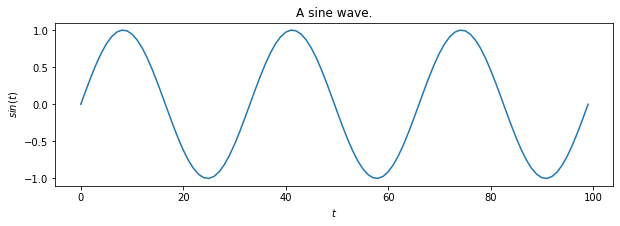

In [450]:
##Data is being run on Reservoir to visualize its activation, 100 disrete time steps from sign function are being input into a reservoir

import numpy as np
import matplotlib.pyplot as plt

X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)

plt.figure(figsize=(10, 3))
plt.title("A sine wave.")
plt.ylabel("$sin(t)$")
plt.xlabel("$t$")
plt.plot(X)
plt.show()

In [451]:
#This activates a node in the reservoir by giving it input


s = reservoir(X[0].reshape(-1,1)) #reshape in this case doesn't make a difference

print(X[0])

print("New state vector shape: ", s.shape)

#Triggering a node on data not only returns the activations of that node, 
#it also store this activation into the node internal state. This state can be accessed anytime using the state() method

#print(reservoir.state)



[0.]
New state vector shape:  (1, 100)


100


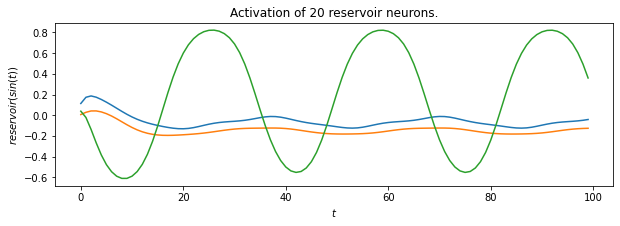

In [452]:
# 20 Neurons in the reservoir are activated for every point in the time series

"""
states = np.empty((len(X), reservoir.output_dim)) #does this line of code create a 2D array

for i in range(len(X)):
    states[i] = reservoir(X[i].reshape(1, -1))
"""
print(reservoir.output_dim)

#The 3 lines above are equivalant to this line
states = reservoir.run(X)

plt.figure(figsize=(10, 3))
plt.title("Activation of 20 reservoir neurons.")
plt.ylabel("$reservoir(sin(t))$")
plt.xlabel("$t$")
plt.plot(states[:,17:20])
plt.show()

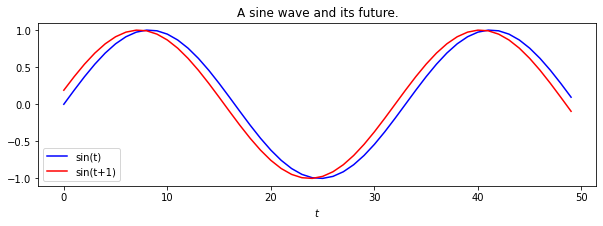

In [453]:
#################################################################
#1. Creating a Readout

#Ridge referes to training the output layer using linear regression
#Regularization hyperparameter (1e-7) added to avoid overfitting
from reservoirpy.nodes import Ridge

readout = Ridge(ridge=1e-7)

#Training reservoir to predict 1 timesptep in advance 
X_train = X[:50] #this is the input for the training example
Y_train = X[1:51] #this the target

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(X_train, label="sin(t)", color="blue")
plt.plot(Y_train, label="sin(t+1)", color="red")
plt.legend()
plt.show()


In [454]:
###########################
#2. Training Process

train_states = reservoir.run(X_train, reset=True) #Putting input values into higher dimensional space
readout = readout.fit(train_states, Y_train, warmup=10) #Training the readout layer. Warm-up discards first 10 timestep values
#The first 10 train_states that correspond to the first 10 x_train timesteps are being discarded.

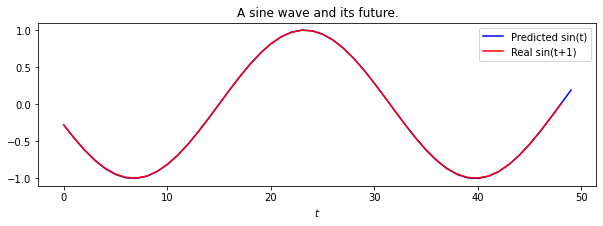

In [455]:
#3. Testing the Reservoir

test_states = reservoir.run(X[50:]) #Running the X data set through the reservoir and producing the higher dimensional space
Y_pred = readout.run(test_states) #Predicting the Sin curve with 1 value in advanve by running the content in the higher dimensional state through the readout layer

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()


True True True


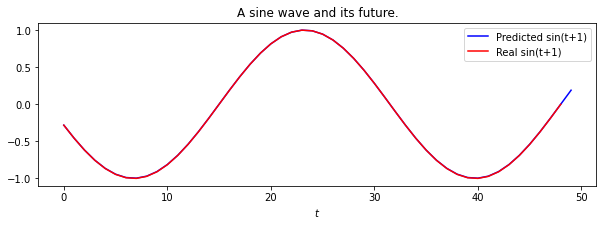

In [456]:
####################################
#New Example: Using a Model (entire ESN - combination of reservoir and readout layer) to predict the next timestep in a sine wave

from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(100, lr=0.5, sr=0.9)
ridge = Ridge(ridge=1e-7) #Ridge is the readout lyaer: uses linear regression

esn_model = reservoir >> ridge #This connects the ridge node to the reservoir


esn_model = esn_model.fit(X_train, Y_train, warmup=10) #This trains the esn_model using the X_train as the input data and Y_train as the target data 
# Does the same thing as the previous program, just more condensed

print(reservoir.is_initialized, readout.is_initialized, readout.fitted)


#This runs the X data through the reservoir and produces output that should match the predicted future curve
Y_pred = esn_model.run(X[50:])

#comparing the predicted curve to the actual curve
plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t+1)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()
